# [Modelo de Regresión Lineal con TensorFlow](https://www.youtube.com/watch?v=XI3v1415r8w&list=PL7HAy5R0ehQVdPVLV6pIJA9ZE2vVyLRxX&index=41)

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [7]:
# Crear datos random
N= 200
X= np.random.random(N) * 9 -5
y= 0.5 * X - 1 + np.random.randn(N) * 0.5

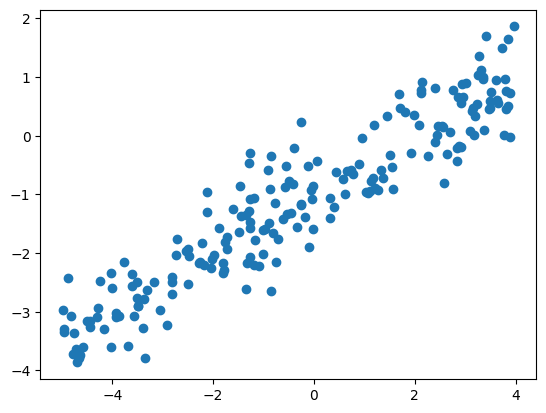

In [9]:
plt.scatter(X, y);

In [11]:
# construir el modelo
i = Input(shape=(1,)) # es un tensor unidimensional de la forma (1,), lo que significa que solo hay una característica para cada ejemplo de 
x = Dense(1)(i) # Define una capa densa (interconectada) con una unidad de salida

modelo = Model(i, x)

In [13]:
modelo.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
modelo.compile(
    loss = 'mse', # establece la función de pérdida del modelo en el error cuadrático medio (MSE), común en problemas de regresión
    optimizer = Adam(learning_rate=0.1), # Adam es un algoritmo de optimización popular y eficiente que ajusta
                                         # la tasa de aprendizaje de manera eficaz
    metrics=['mae'] # también queremos monitorear la tasa de error absoluto medio (MAE), común en problemas de regresión
)

In [19]:
r = modelo.fit(
    X.reshape(-1, 1), y,
    epochs = 800,
    batch_size = 32, # la precisión aumenta a medida que se baja este parámetro (ya que se articiona menos)
                     # pero también tarda más
)

Epoch 1/800
7/7 [==============================] - 0s 3ms/step - loss: 2.8419 - mae: 1.3497
Epoch 2/800
7/7 [==============================] - 0s 2ms/step - loss: 0.3983 - mae: 0.5092
Epoch 3/800
7/7 [==============================] - 0s 2ms/step - loss: 0.6179 - mae: 0.6353
Epoch 4/800
7/7 [==============================] - 0s 2ms/step - loss: 0.3711 - mae: 0.4680
Epoch 5/800
7/7 [==============================] - 0s 3ms/step - loss: 0.3065 - mae: 0.4464
Epoch 6/800
7/7 [==============================] - 0s 2ms/step - loss: 0.2762 - mae: 0.4249
Epoch 7/800
7/7 [==============================] - 0s 2ms/step - loss: 0.2598 - mae: 0.4188
Epoch 8/800
7/7 [==============================] - 0s 2ms/step - loss: 0.2509 - mae: 0.3980
Epoch 9/800
7/7 [==============================] - 0s 2ms/step - loss: 0.2478 - mae: 0.3890
Epoch 10/800
7/7 [==============================] - 0s 2ms/step - loss: 0.2445 - mae: 0.3935
Epoch 11/800
7/7 [==============================] - 0s 3ms/step - loss: 0.2445 

In [25]:
# Predicción
X_test = np.linspace(-5,4,20).reshape(-1,1)
ptest = modelo.predict(X_test)

1/1 [==============================] - 0s 21ms/step


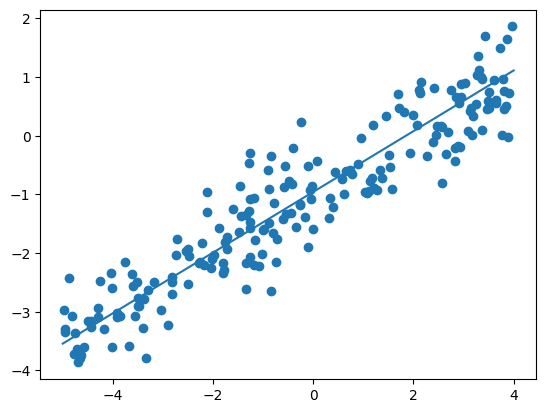

In [29]:
plt.scatter(X, y)
plt.plot(X_test, ptest);

In [33]:
modelo.layers[1].get_weights()

[array([[0.5172888]], dtype=float32), array([-0.9556047], dtype=float32)]